# whatsapp-analysis

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

You should consider upgrading via the 'c:\users\demilade somide\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import jovian

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
import regex
import re

In [4]:
with open("Chat 2.txt", mode = "r", encoding = "utf-8") as f:
    for lines in f:
        print(lines)

7/25/20, 19:31 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.

7/25/20, 19:31 - Richard created group "Tech something something "

7/25/20, 19:31 - Richard: Hi all

7/25/20, 19:31 - Richard added you

7/25/20, 19:31 - Richard: I've been wanting to do this for a while now, was looking for the perfect time

7/25/20, 19:31 - OS(Tech): Tech something something?

7/25/20, 19:32 - Richard changed this group's settings to allow only admins to send messages to this group

7/25/20, 19:32 - Richard: Unfortunately the perfect time almost always does not come

7/25/20, 19:32 - Richard: So I'll just do it now anyway

7/25/20, 19:35 - Richard: I'm in tech, i know a couple of people in tech too and I know a lot of people who are learning as well.



Some of you have reached out to me in the past and asked for some tips and it gave me joy to see you guys progress so fast. So I decided, why not have a little 


2/27/21, 19:57 - JIC: Good evening to you all hope you all staying safe and having a nice weekend ..

2/27/21, 22:25 - Mazi(Tech): Yelz

2/27/21, 22:56 - Ayomide(Tech): We want money

3/2/21, 20:00 - Shula: Hi friends!

3/2/21, 20:00 - Shula: Good evening...

3/2/21, 20:00 - Mazi(Tech): <Media omitted>

3/2/21, 20:01 - Shula: How are we all getting on?

3/2/21, 20:02 - Shula: Hope we’re doing fine

3/2/21, 20:02 - Shula: And nobody is sick

3/2/21, 20:02 - Shula: Or lacking money🌝

3/2/21, 20:10 - Shula: Lol.  Basically, I hope we’re not disturbed by anything more than our usuals?

3/2/21, 20:11 - Shula: If we’re not, it’s great to know that

3/2/21, 20:13 - Shula: Lol @2349058028858 how far naa? How are you doing?😅

3/2/21, 20:13 - Shula: This one you’re hiding your face😂

3/2/21, 20:24 - JEphraim: I am o

3/2/21, 20:38 - Mazi(Tech): Mé is lacking money ooo

3/2/21, 20:40 - Mazi(Tech): I'm doing not fine

3/2/21, 20:43 - Shula: Sorry to hear this you two

3/2/21, 20:44 - Shula: Money

In [5]:
data = []

In [6]:
with open("Chat 2.txt", mode = "r", encoding = "utf-8") as f:
    for index,line in enumerate(f):
        try:
            send_time, message_section = line.strip().split("-")
            author, message = message_section.split(":", maxsplit=1)
            date, time = send_time.split(",")
            
            data_dict = {"Date": date, "Time": time, "Author": author, "Message": message}
            
            data.append(data_dict)
        except:
            pass
         
chat_data = pd.DataFrame(data)    

In [7]:
chat_data

,Date,Time,Author,Message
0,7/25/20,19:31,Richard,Hi all
1,7/25/20,19:31,Richard,"I've been wanting to do this for a while now,..."
2,7/25/20,19:31,OS(Tech),Tech something something?
3,7/25/20,19:32,Richard,Unfortunately the perfect time almost always ...
4,7/25/20,19:32,Richard,So I'll just do it now anyway
...,...,...,...,...
1756,8/1/21,22:17,Shula,Yeahh sure o
1757,8/1/21,22:49,Mazi(Tech),Seconded
1758,8/12/21,18:05,Ayomide(Tech),Are you living in Nigeria and looking to work...
1759,8/12/21,18:05,Ayomide(Tech),"I don't know who needs this. The pay is #166,..."


In [8]:
chat_data.head(70)

,Date,Time,Author,Message
0,7/25/20,19:31,Richard,Hi all
1,7/25/20,19:31,Richard,"I've been wanting to do this for a while now,..."
2,7/25/20,19:31,OS(Tech),Tech something something?
3,7/25/20,19:32,Richard,Unfortunately the perfect time almost always ...
4,7/25/20,19:32,Richard,So I'll just do it now anyway
...,...,...,...,...
65,7/25/20,20:54,Richard,The name.
66,7/25/20,20:54,Richard,.
67,7/25/20,20:54,Richard,.
68,7/25/20,20:54,Richard,.


In [9]:
### UNIQUE USERS IN GROUP CHAT
unique_senders = chat_data["Author"].unique()
unique_senders

array([' Richard', ' OS(Tech)', ' Me', ' Ayomide(Tech)', ' Mazi(Tech)',
       ' Andrew(tech)', ' Unknown2', ' OJ(Tech)', ' Shula', ' JEphraim',
       ' Emem(Tech)', ' +234 813 970 4559', ' JIC', ' Tech Unknown',
       ' +234 803 390 9802'], dtype=object)

In [10]:
chat_data["Message"]

0                                                  Hi all
1        I've been wanting to do this for a while now,...
2                               Tech something something?
3        Unfortunately the perfect time almost always ...
4                           So I'll just do it now anyway
                              ...                        
1756                                         Yeahh sure o
1757                                             Seconded
1758     Are you living in Nigeria and looking to work...
1759     I don't know who needs this. The pay is #166,...
1760     You can also share this opportunity and get a...
Name: Message, Length: 1761, dtype: object

In [11]:
#### EXTRACTING EMOJI FROM ALL MESSAGE AN CREATING A COLUMN
emoji_list = []
for message in chat_data["Message"]:
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    
    emojis = emoji_pattern.findall(message)
    emojis = " ".join(emoji for emoji in emojis) 
    emoji_list.append(emojis)
    
chat_data["Emoji"] =  emoji_list   

In [12]:
chat_data

,Date,Time,Author,Message,Emoji
0,7/25/20,19:31,Richard,Hi all,
1,7/25/20,19:31,Richard,"I've been wanting to do this for a while now,...",
2,7/25/20,19:31,OS(Tech),Tech something something?,
3,7/25/20,19:32,Richard,Unfortunately the perfect time almost always ...,
4,7/25/20,19:32,Richard,So I'll just do it now anyway,
...,...,...,...,...,...
1756,8/1/21,22:17,Shula,Yeahh sure o,
1757,8/1/21,22:49,Mazi(Tech),Seconded,
1758,8/12/21,18:05,Ayomide(Tech),Are you living in Nigeria and looking to work...,
1759,8/12/21,18:05,Ayomide(Tech),"I don't know who needs this. The pay is #166,...",


In [13]:
chat_data["Emoji"].unique()

array(['', '🌚', '😄😄', '🏽 ♂️', '🙌🏽', '😂😂 😂😂', '👌🏽👌🏽', '😊😊', '🏽😎', '😊😂',
       '🚶🏽 ♂️🚶🏽 ♂️', '🙋 ♀️🙋 ♀️', '🙇🏾 ♂️🙇🏾 ♂️', '🏽', '😂', '🙈🙈', '😅', '😁',
       '🙌🏽🙌🏽🙌🏽', '😂😂', '👀', '😄', '😏', '🙊🙊', '👮🏻 ♀️', '😳', '😭',
       '🚶🏽 ♂️🚶🏽 ♂️🚶🏽 ♂️', '😑', '😀', '🙏', '🙃', '🙌', '🙋 ♀️', '🌝', '👏👏',
       '🏾 ♂️', '🙇🏽 ♂️', '🙇🏽 ♂️🙇🏽 ♂️🙇🏽 ♂️', '🙌🏻🙇🏻', '😟', '☑️☑️☑️', '♀️',
       '👆', '👍', '👍🏽👍🏽👍🏽', '😒', '😅😅', '😅😂', '😂😂😂', '😏😂', '😂😂😂😂', '🙌🙌',
       '👌', '✊🏽', '🙌🏾🙌🏾🙌🏾', '❤️❤️', '🙌🏾', '😳😳', '❤️❤️❤️', '🖐️', '💪',
       '🙌🏽🙌🏽', '😢', '🙈', '🌝😆', '💰💰', '😅😅😅', '👏', '😅 😅', '😐', '😭😭',
       '🎊🎉🎊🎉🎊🎉', '🙌🏾🙌🏾', '😁🚼', '🔥🔥🔥', '😹😹😹', '🚼', '😹', '🏽 😂😂😂😂', '🙂',
       '☑️☑️', '🔥🔥', '😆', '😩', '🙌🏼🙌🏼', '💪🏽💪🏽💪🏽', '😭😭😭😭😭😭😭', '😁 🏽 🏽', '😪',
       '😃👏👏👏', '🌇', '🙇 ♀️🙇 ♀️', '😹😹😹😹', '💃💃', '💯', '🌆', '🙇 ♀️',
       '🙇🏾 ♂️🙇🏾 ♂️🙇🏾 ♂️', '😣😣', '🎉', '🏽🚼', '🏽 🏽', '😬', '☹️', '😒🚶🏾 ♂️',
       '😊', '😣😣😣', '🙋 ♀️🙈', '🙌😆', '😎', '😀👏🏽👏🏽👏🏽'], dtype=object)

In [14]:
for message in chat_data["Message"]:
    print(message)

 Hi all
 I've been wanting to do this for a while now, was looking for the perfect time
 Tech something something?
 Unfortunately the perfect time almost always does not come
 So I'll just do it now anyway
 I'm in tech, i know a couple of people in tech too and I know a lot of people who are learning as well.
 Everyone in the group is a witness by the way.
 Going forward, if anyone else has to be added to the group,  those are the 2 basic criterias
 In the coming days we'll structure how the group would be.
 The goal in the end is to help everyone
 We'll try and do real life projects as that's the only way you'll really learn
 My name is:
 You can introduce yourself following that pattern
 Good evening everyone
 And I will like to say thanks to the admin for creating the group  cause have actual been looking of a tech community to join
 Hi Demilade.
 Good evening everyone
 Hello
 I'm Ayomide Solarin
 Saving your number now.
 Ok Cool
 Nice to meet you
 <Media omitted>
 Good evening.
 Th

 I think I keep missing up your identities @2349019071971 and @2349058028858
 Most have been the reason I replied you with this @2349019071971
 🤣🤣🤣
 I am so lost. What are you even talking about?
 I am not @2349058028858 I can never be. I fine pass am
 Ok, things didn't go as planned for me, a lot of impromptus but i was able to start with my Html refresher course and nothing at all on CSS(shame) ...
 Sounds cool.
 I’m sure in a few months from now, you’ll be veery far from here. Could be possibly handling a gig
 This sounds cool too!
 We’d like to hear about your practice 💪
 So for the current week, I’ll be doing a little more work on my express app. It’s actually from a course I’m taking, and I think the next task to complete on it is to create “User defined” pages using Express Route Parameters.  I’ve done this kinda thing before, so it shouldn’t be so hard.
 So I think the two things I’m making my goal in addition to the express app, is styling the frontend app. I hate designing, s

In [15]:
### INSTALLING A MODULE TO HELP EXTRACT URLS
!pip install urlextract --upgrade --quiet

You should consider upgrading via the 'c:\users\demilade somide\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [16]:
### EXTRCTING URLS FROM ALL MESSAGES AND CREATING A COLUMN COLUMN FOR IT
### USING REGEX MAYBE A BIT CHALLENGING SO I DECIDED TO US A MODULE
from urlextract import URLExtract

url_list = []
extractor = URLExtract()
for message in chat_data["Message"]:
    urls = extractor.find_urls(message) 
    url = " ".join(url for url in urls)
    url_list.append(url)
    
chat_data["Url"] = url_list

In [17]:
chat_data["Url"].unique()

array(['', 'https://github.com/drachomi/TssBudgtet',
       'https://summerofcode.withgoogle.com',
       'Outreachy.org/docs/applicant', 'sololearn.com',
       'https://www.outreachy.org/apply/',
       'https://twitter.com/olanetsoft/status/1359414929841872897?s=19',
       'https://www.pirple.com/', 'medium.com',
       'https://twitter.com/PancakeSwap/status/1359552902612701184?s=19',
       'dev.to hashnode.com',
       'https://twitter.com/risingodegua/status/1359787336960212996?s=19',
       'https://training.zuri.team/enrollment',
       'https://github.com/Leaflet/Leaflet/labels/good%20first%20issue',
       'bit.ly/scaslacksignup',
       'https://mobile.twitter.com/SheCodeAfrica/status/1366406505004732417',
       'https://twitter.com/TheBulbAfrica/status/1366361390412398594?s=19',
       'https://www.codementor.io/projects',
       'https://mysoko.app/classicshop/'], dtype=object)

In [18]:
chat_data

,Date,Time,Author,Message,Emoji,Url
0,7/25/20,19:31,Richard,Hi all,,
1,7/25/20,19:31,Richard,"I've been wanting to do this for a while now,...",,
2,7/25/20,19:31,OS(Tech),Tech something something?,,
3,7/25/20,19:32,Richard,Unfortunately the perfect time almost always ...,,
4,7/25/20,19:32,Richard,So I'll just do it now anyway,,
...,...,...,...,...,...,...
1756,8/1/21,22:17,Shula,Yeahh sure o,,
1757,8/1/21,22:49,Mazi(Tech),Seconded,,
1758,8/12/21,18:05,Ayomide(Tech),Are you living in Nigeria and looking to work...,,
1759,8/12/21,18:05,Ayomide(Tech),"I don't know who needs this. The pay is #166,...",,


In [19]:
### FILLING ALL EMPTY COLUMN WITH NAN
chat_data = chat_data.replace(r'^\s*$', np.nan, regex=True)

In [20]:
### Adding one more column of "Day" for better analysis, here we use datetime library which help us to do this task easily.
from datetime import datetime
chat_data["Date"] = pd.to_datetime(chat_data.Date)
chat_data["Day"] = chat_data["Date"].dt.day_name()
chat_data

,Date,Time,Author,Message,Emoji,Url,Day
0,2020-07-25,19:31,Richard,Hi all,NaN,NaN,Saturday
1,2020-07-25,19:31,Richard,"I've been wanting to do this for a while now,...",NaN,NaN,Saturday
2,2020-07-25,19:31,OS(Tech),Tech something something?,NaN,NaN,Saturday
3,2020-07-25,19:32,Richard,Unfortunately the perfect time almost always ...,NaN,NaN,Saturday
4,2020-07-25,19:32,Richard,So I'll just do it now anyway,NaN,NaN,Saturday
...,...,...,...,...,...,...,...
1756,2021-08-01,22:17,Shula,Yeahh sure o,NaN,NaN,Sunday
1757,2021-08-01,22:49,Mazi(Tech),Seconded,NaN,NaN,Sunday
1758,2021-08-12,18:05,Ayomide(Tech),Are you living in Nigeria and looking to work...,NaN,NaN,Thursday
1759,2021-08-12,18:05,Ayomide(Tech),"I don't know who needs this. The pay is #166,...",NaN,NaN,Thursday


In [21]:
### TOTAL NUMBER OF MESSAGES, URL,MEDIA, EMOJIS IN THE GROUP CHAT
total_url = chat_data[chat_data["Url"].notna()].shape[0]

total_messages = chat_data.shape[0]

MEDIAPATTERN = r'<Media omitted>'

chat_data['Media_Count'] = chat_data.Message.apply(lambda x : re.findall(MEDIAPATTERN, x)).str.len()
media = np.sum(chat_data.Media_Count)


Notna_emoji = chat_data[chat_data["Emoji"].notna()] 
number_of_emojis_in_message = Notna_emoji.Emoji.apply(lambda e: len([i for i in e]))
total_emoji = np.sum(number_of_emojis_in_message)

print('Group Chat Stats : ')
print('Total Number of Messages : {}'.format(total_messages))
print('Total Number of Media Messages : {}'.format(media))
print('Total Number of Links : {}'.format(total_url))
print("Total number of Emojis : {}".format(total_emoji))

Group Chat Stats : 
Total Number of Messages : 1761
Total Number of Media Messages : 145
Total Number of Links : 19
Total number of Emojis : 595


### Group Chat Stats
### Total Number of Messages : 1761
### Total Number of Media Messages : 145
### Total Number of Links : 19
### Total number of Emojis : 595

In [22]:
### PERCENTAGE OF MEDIA, LINK, EMOJI MESSAGE 
message_type_value = [total_emoji, total_url, media]
message_type = ["Emoji", "Url", "Media"]


### Percentage Of Media Link And Emoji Message

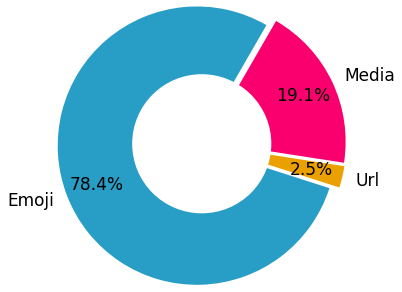

In [23]:
plt.pie(message_type_value, colors=["#289DC6", "#EAA100", "#F9006E"], labels= message_type, radius=1.6, autopct= "%0.1f%%", pctdistance = 0.77,
        textprops = {"size" : 17, "color" : "#000000"}, explode= [0.06, 0.06, 0.06], startangle= 60)

centre_circle = plt.Circle((0,0), 0.8, fc = "w")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [24]:
chat_data.Message

0                                                  Hi all
1        I've been wanting to do this for a while now,...
2                               Tech something something?
3        Unfortunately the perfect time almost always ...
4                           So I'll just do it now anyway
                              ...                        
1756                                         Yeahh sure o
1757                                             Seconded
1758     Are you living in Nigeria and looking to work...
1759     I don't know who needs this. The pay is #166,...
1760     You can also share this opportunity and get a...
Name: Message, Length: 1761, dtype: object

In [25]:
### Counting number of letters in each message
chat_data["Letters"] = chat_data['Message'].apply(lambda s : sum([len(i) for i in s.split(" ")]))
### Counting number of word's in each message
chat_data["Words"] = chat_data['Message'].apply(lambda s : len(s.split(' ')) - 1)  

In [26]:
chat_data= chat_data[["Date", "Day", "Time", "Author", "Message", "Emoji", "Url", "Media_Count", "Letters", "Words"]]

In [27]:
chat_data

,Date,Day,Time,Author,Message,Emoji,Url,Media_Count,Letters,Words
0,2020-07-25,Saturday,19:31,Richard,Hi all,NaN,NaN,0,5,2
1,2020-07-25,Saturday,19:31,Richard,"I've been wanting to do this for a while now,...",NaN,NaN,0,63,16
2,2020-07-25,Saturday,19:31,OS(Tech),Tech something something?,NaN,NaN,0,23,3
3,2020-07-25,Saturday,19:32,Richard,Unfortunately the perfect time almost always ...,NaN,NaN,0,50,9
4,2020-07-25,Saturday,19:32,Richard,So I'll just do it now anyway,NaN,NaN,0,23,7
...,...,...,...,...,...,...,...,...,...,...
1756,2021-08-01,Sunday,22:17,Shula,Yeahh sure o,NaN,NaN,0,10,3
1757,2021-08-01,Sunday,22:49,Mazi(Tech),Seconded,NaN,NaN,0,8,1
1758,2021-08-12,Thursday,18:05,Ayomide(Tech),Are you living in Nigeria and looking to work...,NaN,NaN,0,106,21
1759,2021-08-12,Thursday,18:05,Ayomide(Tech),"I don't know who needs this. The pay is #166,...",NaN,NaN,0,60,14


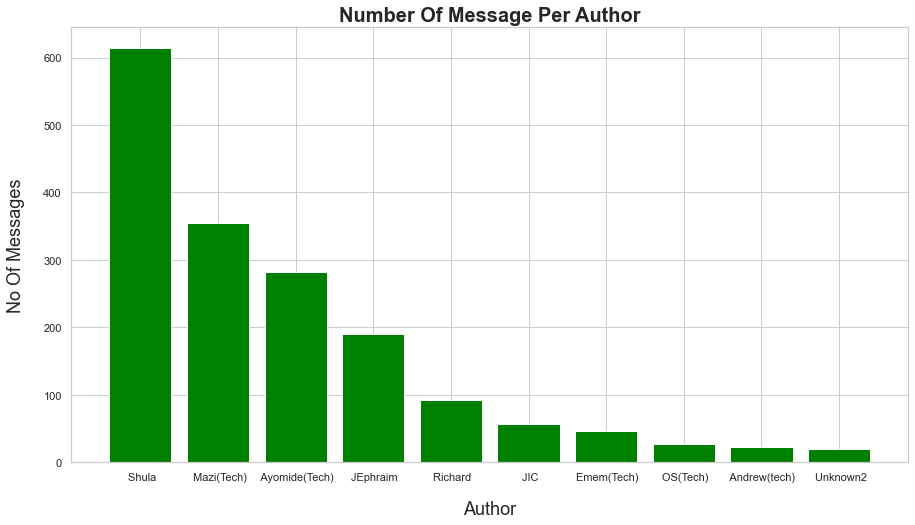

In [28]:
### AUTHOR WITH THE HIGHEST NUMBER OF MESSAGES
author_list = chat_data["Author"].value_counts()[:10].index.to_list()
message_numbers = chat_data["Author"].value_counts()[:10].to_list()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,8))
plt.bar(author_list, message_numbers, color= "green", width = 0.8)
plt.xlabel("Author", fontdict= {"fontsize" : 18}, labelpad= 18)
plt.ylabel("No Of Messages", fontdict= {"fontsize" : 18}, labelpad= 18)
plt.title("Number Of Message Per Author", fontdict= {"fontsize" : 20, "fontweight" : "bold"})

plt.show()

In [29]:
### NUMBER OF MESSAGES, LINK, MEDIA FOR UNIQUE USERS
unique_author_values = []
author_list = chat_data.Author.unique()

for i in author_list:
    author = i
    author_data = chat_data[chat_data["Author"] == i]
    
    total_messages = author_data.shape[0]
    
    total_url = author_data[author_data["Url"].notna()].shape[0]
    
    total_media = np.sum(author_data.Media_Count)
    
    Notna_emoji = author_data[author_data["Emoji"].notna()] 
    number_of_emojis_in_message = Notna_emoji.Emoji.apply(lambda e: len([i for i in e]))
    total_emoji = np.sum(number_of_emojis_in_message)
    
    author_dict = {"author": author, "messages": total_messages, "url": total_url, "media" : total_media,
                   "emoji": total_emoji }
    
    unique_author_values.append(author_dict)   

In [30]:
for i in unique_author_values:
    print("sender:",i["author"])
    print("Total Message in the group chat is", i["messages"])
    print("Total Emoji in the group chat is", i["emoji"])
    print("Total Media in the group chat is", i["media"])
    print("Total Url in the group chat is", i["url"])
    print("_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _")
    print("\n")

sender:  Richard
Total Message in the group chat is 92
Total Emoji in the group chat is 1
Total Media in the group chat is 1
Total Url in the group chat is 1
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _


sender:  OS(Tech)
Total Message in the group chat is 27
Total Emoji in the group chat is 7
Total Media in the group chat is 0
Total Url in the group chat is 0
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _


sender:  Me
Total Message in the group chat is 13
Total Emoji in the group chat is 2
Total Media in the group chat is 0
Total Url in the group chat is 0
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _


sender:  Ayomide(Tech)
Total Message in the group chat is 282
Total Emoji in the group chat is 102
Total Media in the group chat is 36
Total Url in the group chat i

In [31]:
### GROUPED BAR CHART SHOWING MEDIA, MESSAGES, LINKS BETWEEN TOP THREE MESSAGE SENDERS
top_three_authors = chat_data["Author"].value_counts()[:3].index.to_list()
top_three_authors_details = list(filter(lambda x: True if x["author"] in top_three_authors else False, unique_author_values))

first_bar_data = [i["messages"] for i  in  top_three_authors_details]
second_bar_data = [i["media"] for i in top_three_authors_details]
third_bar_data = [i["emoji"] for i in top_three_authors_details]

             
print(top_three_authors_details)

[{'author': ' Ayomide(Tech)', 'messages': 282, 'url': 3, 'media': 36, 'emoji': 102}, {'author': ' Mazi(Tech)', 'messages': 355, 'url': 5, 'media': 26, 'emoji': 149}, {'author': ' Shula', 'messages': 614, 'url': 8, 'media': 42, 'emoji': 257}]


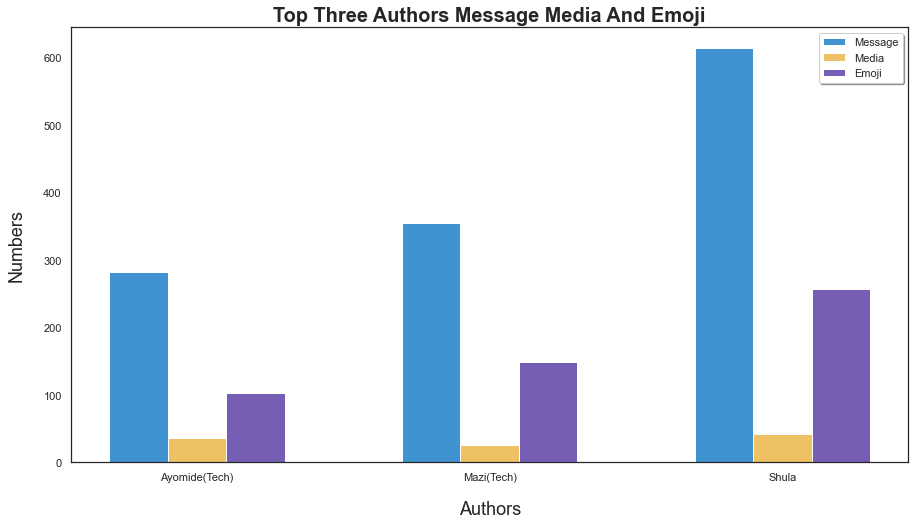

In [32]:
sns.set_theme(style= "white")
plt.figure(figsize=(15,8))
width = 0.2
bar1 = np.arange(3)
bar2 = [i + width for i in bar1]
bar3 = [i + width for i in bar2]

plt.bar(bar1, first_bar_data, width, color = "#3F93D0", label = "Message")
plt.bar(bar2, second_bar_data, width, color = "#EDC164", label = "Media")
plt.bar(bar3, third_bar_data, width, color = "#765EB4", label = "Emoji")
plt.xticks(bar1 + 0.2, ["Ayomide(Tech)", "Mazi(Tech)", "Shula"], )       
        
plt.title("Top Three Authors Message Media And Emoji", fontdict= {"fontsize" : 20, "fontweight" : "bold"})
plt.xlabel("Authors", fontdict= {"fontsize" : 18}, labelpad= 18)
plt.ylabel("Numbers", fontdict= {"fontsize" : 18}, labelpad= 18)
plt.legend(loc = "best", shadow = True)
plt.show()                           

In [33]:
### MOST USED EMOJIS IN DATAFRAME
most_used_emoji = chat_data.Emoji.value_counts()[:5].index
most_used_emoji_values = chat_data.Emoji.value_counts()[:5]
emoji_data = pd.DataFrame(most_used_emoji_values, index= most_used_emoji)
emoji_data

,Emoji
😂,19
😅,19
🌝,10
🙋 ♀️🙋 ♀️,9
🏽,8


In [34]:
!pip install demoji

You should consider upgrading via the 'c:\users\demilade somide\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


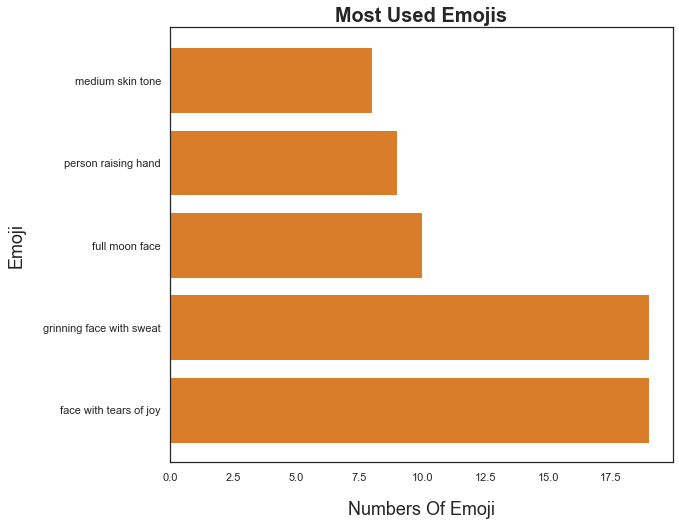

In [35]:
import demoji
sns.set_theme(style="white")
plt.figure(figsize=(9,8))

emoji_dict = {}
for e in most_used_emoji:
    emoji_dict.update(demoji.findall(e))

text_emoji = list(emoji_dict.values())
text_emoji.remove('female sign')
plt.barh(text_emoji, most_used_emoji_values, color= "#DA7D2B")
plt.xlabel("Numbers Of Emoji", fontdict= {"fontsize" : 18}, labelpad= 18)
plt.ylabel("Emoji", fontdict= {"fontsize" : 18}, labelpad= 18)
plt.title("Most Used Emojis", fontdict= {"fontsize" : 20, "fontweight" : "bold"})

plt.show()

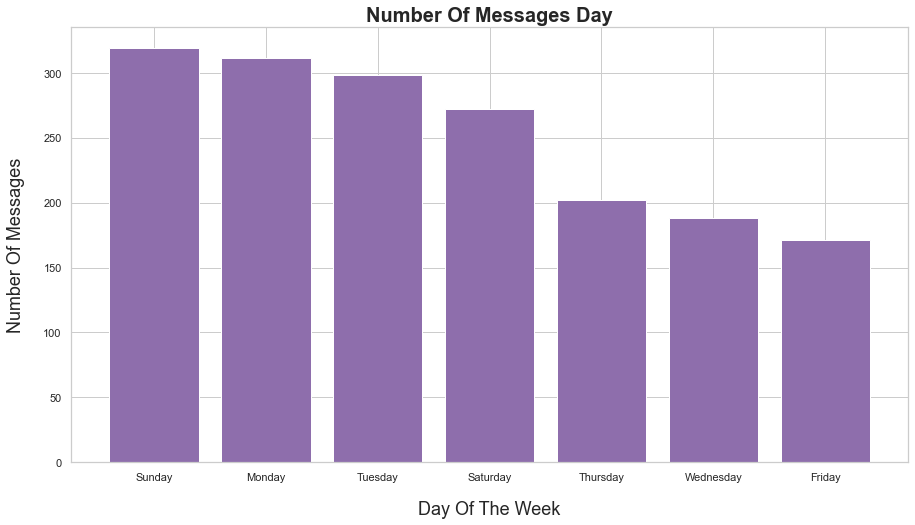

In [36]:
### DAY OF THE WEEK WITH NUMBER OF MESSAGES
days = chat_data["Day"].value_counts().index
days_value = chat_data["Day"].value_counts()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,8))
plt.bar(days, days_value, color= "#8E6EAC")
plt.xlabel("Day Of The Week", fontdict= {"fontsize" : 18}, labelpad= 18)
plt.ylabel("Number Of Messages", fontdict= {"fontsize" : 18}, labelpad= 18)
plt.title("Number Of Messages Day", fontdict= {"fontsize" : 20, "fontweight" : "bold"})

plt.show()

### Word Cloud Showing The Most Frequently Used Words In The Group Chat

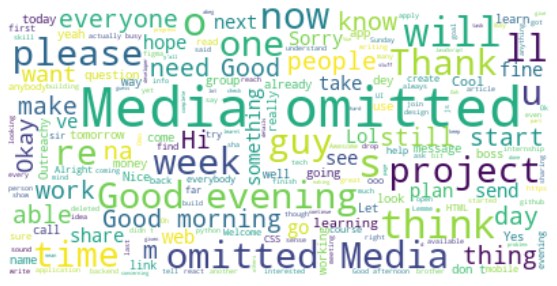

In [37]:
#### WORD CLOUD OF MOST USED WORDS IN THE GROUP CHAT
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
text = " ".join(review for review in chat_data.Message)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=600).generate(text)

plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
from datetime import datetime

In [39]:
chat_data["Time"] = chat_data.Time.apply(lambda t: t.strip())
converted_time = chat_data.Time.apply(lambda t: datetime.strptime(t, "%H:%M"))

In [40]:
#### MOST ACTIVE TIME PERIODS
time = converted_time.apply(lambda x: x.strftime("%I:%M %p"))
time_number = time.value_counts()[:10].index
time_number_values = time.value_counts()[:10]

### From the chart we observe that the group chat is more active during the evening to night hours  

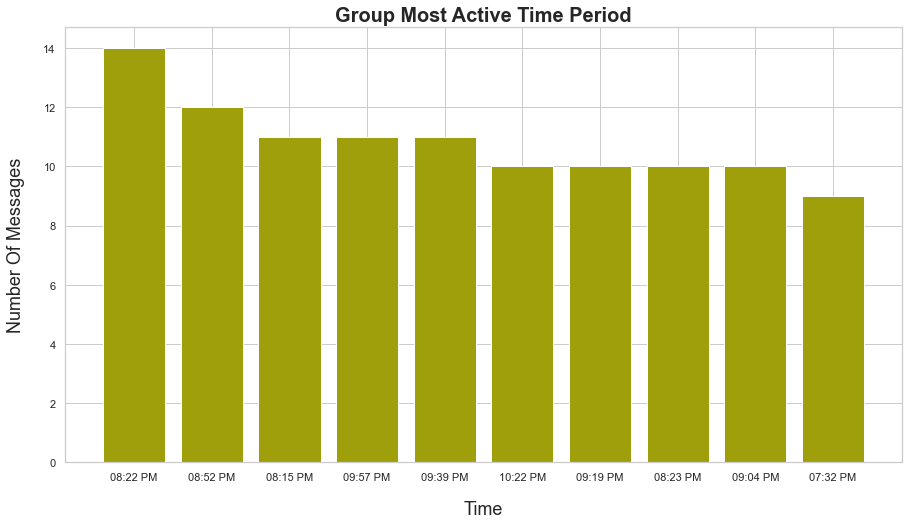

In [41]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,8))
plt.bar(time_number, time_number_values, color= "#9E9F0A")
plt.xlabel("Time", fontdict= {"fontsize" : 18}, labelpad= 18)
plt.ylabel("Number Of Messages", fontdict= {"fontsize" : 18}, labelpad= 18)
plt.title("Group Most Active Time Period", fontdict= {"fontsize" : 20, "fontweight" : "bold"})
plt.xticks(rotation = 360)

plt.show()

In [42]:
### PERCENTAGE OF MESSAGES SENT IN THE MORNING AND EVENING
time_type =["Evening", "Afternoon", "Morning"]
Time_list = []

Evening_Time = chat_data.loc[(chat_data["Time"] >= "17:01") & (chat_data["Time"] <= "21:00")].count()[0]
Time_list.append(Evening_Time)

Afternoon_Time = chat_data.loc[(chat_data["Time"] >= "12:00") & (chat_data["Time"] <= "17:00")].count()[0]
Time_list.append(Afternoon_Time)

Morning_Time = chat_data.loc[(chat_data["Time"] >= "06:00") & (chat_data["Time"] <= "11:59")].count()[0]
Time_list.append(Morning_Time)

### Percentage Of Message Sent In The Evening Afternoon And Morining

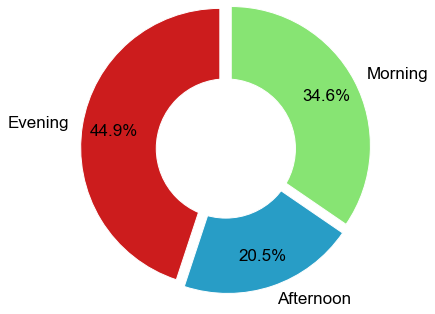

In [44]:
plt.pie(Time_list, colors=["#CC1C1D", "#289DC6", "#87E473"], labels= time_type, radius=1.6, autopct= "%0.1f%%", pctdistance = 0.77,
        textprops = {"size" : 17, "color" : "#000000"}, explode= [0.07,0.07,0.07],startangle=90)

centre_circle = plt.Circle((0,0), 0.8, fc = "w")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [45]:
### MONTH WITH THE HIHGEST NUMBER MESSAGES
chat_data["Date"] = pd.to_datetime(chat_data.Date)
months = chat_data["Date"].dt.month_name()
months_name = months.value_counts().index
months_value = months.value_counts()


### November Bar is not visible cause it was only one message that was sent during that month and can be ignored.

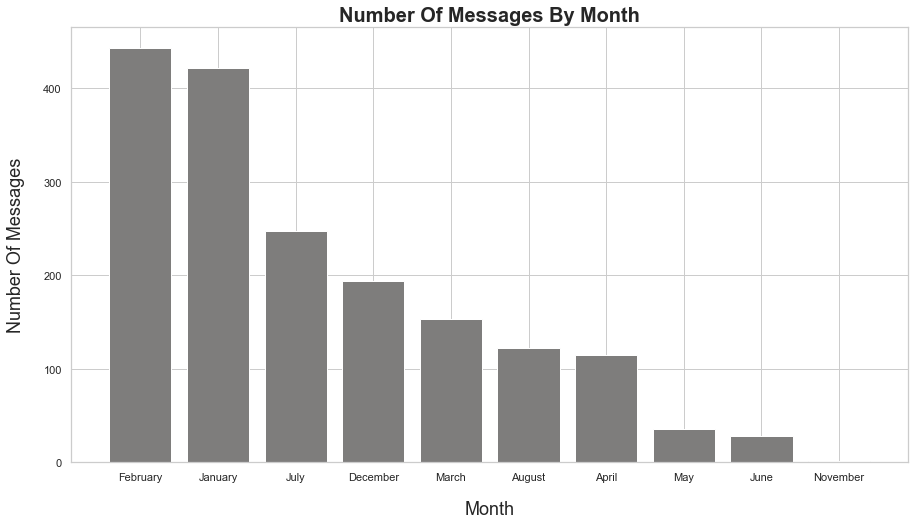

In [46]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,8))
plt.bar(months_name, months_value, color= "#7E7D7C")
plt.xlabel("Month", fontdict= {"fontsize" : 18}, labelpad= 18)
plt.ylabel("Number Of Messages", fontdict= {"fontsize" : 18}, labelpad= 18)
plt.title("Number Of Messages By Month", fontdict= {"fontsize" : 20, "fontweight" : "bold"})


plt.show()

In [47]:
chat_data.Date

0      2020-07-25
1      2020-07-25
2      2020-07-25
3      2020-07-25
4      2020-07-25
          ...    
1756   2021-08-01
1757   2021-08-01
1758   2021-08-12
1759   2021-08-12
1760   2021-08-12
Name: Date, Length: 1761, dtype: datetime64[ns]

In [48]:
### FLOW OF MESSAGE SINCE GROUP CREATION
date_year = chat_data["Date"].apply(lambda x: x.strftime("%b-%Y"))
new_date_year = date_year.apply(lambda x: x.replace("-", " "))
Months_year = new_date_year.value_counts(sort=False).index
Months_year_value = new_date_year.value_counts(sort=False)

In [49]:
### From the graph we can see that the number of message started to decline from march 2021

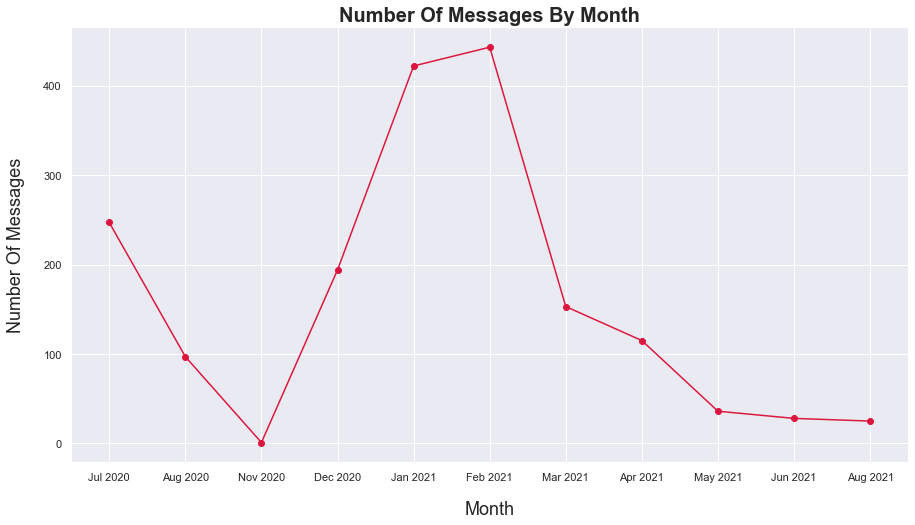

In [50]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
plt.plot(Months_year, Months_year_value, color= "crimson", marker="o", alpha= 0.99)
plt.xlabel("Month", fontdict= {"fontsize" : 18}, labelpad= 18)
plt.ylabel("Number Of Messages", fontdict= {"fontsize" : 18}, labelpad= 18)
plt.title("Number Of Messages By Month", fontdict= {"fontsize" : 20, "fontweight" : "bold"})


plt.show()

In [51]:
# Execute this to save new versions of the notebook
jovian.commit(project="whatsapp-analysis")

<IPython.core.display.Javascript object>

[jovian] Creating a new project "demisomide/whatsapp-analysis"
[jovian] Committed successfully! https://jovian.ai/demilade/whatsapp-analysis-ae8fb


'https://jovian.ai/demilade/whatsapp-analysis-ae8fb'